## EDA perform on Black Friday Sales data
### Steps perform in this EDA notebook
- Data Cleaning
- Univariate, Bivariate, Multivariate Analysis
- Feature Engineering
- Visualizations with Insights

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Loading Dataset
df = pd.read_csv('../data/train.csv')
pd.set_option('display.max_columns', None)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
# Data Cleaning
# Dropping not required columns
df.drop(['Product_ID'], axis=1, inplace=True)
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# Handling Age column
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [6]:
df['Age'] = df['Age'].map({'0-17' : 1,
                           '18-25' : 2,
                           '26-35' : 3,
                           '36-45' : 4,
                           '46-50' : 5,
                           '51-55' : 6,
                           '55+' : 7}).astype(int)
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,1,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,1,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,1,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,7,16,C,4+,0,8,NaN,NaN,7969


In [7]:
# Handling Stay_In_Current_City_Years column
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


In [8]:
# Handling missing values in Product_Category_2 and Product_Category_3
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0]).astype(int)
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0]).astype(int)
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,1,10,A,2,0,3,8,16,8370
1,1000001,F,1,10,A,2,0,1,6,14,15200
2,1000001,F,1,10,A,2,0,12,8,16,1422
3,1000001,F,1,10,A,2,0,12,14,16,1057
4,1000002,M,7,16,C,4,0,8,8,16,7969


In [9]:
df.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
# Creating Age Group feature
df['Age_Group'] = df['Age'].map({1 : 'Teen',
                           2 : 'Young Adult',
                           3 : 'Adult',
                           4 : 'Adult',
                           5 : 'Senior',
                           6 : 'Senior',
                           7 : 'Senior',})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  int64 
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  int64 
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category_1          550068 non-null  int64 
 8   Product_Category_2          550068 non-null  int64 
 9   Product_Category_3          550068 non-null  int64 
 10  Purchase                    550068 non-null  int64 
 11  Age_Group                   550068 non-null  object
dtypes: int64(9), object(3)
memory usage: 50.4+ MB


In [11]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Group
0,1000001,F,1,10,A,2,0,3,8,16,8370,Teen
1,1000001,F,1,10,A,2,0,1,6,14,15200,Teen
2,1000001,F,1,10,A,2,0,12,8,16,1422,Teen
3,1000001,F,1,10,A,2,0,12,14,16,1057,Teen
4,1000002,M,7,16,C,4,0,8,8,16,7969,Senior


In [12]:
# Creating Avg_Purchase_Per_Customer column
Avg_Purchase = df.groupby('User_ID')['Purchase'].mean().astype(int).reset_index()
Avg_Purchase.rename(columns={'Purchase' : 'Avg_Purchase'}, inplace=True)
df = df.merge(Avg_Purchase, on='User_ID', how='left')
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Group,Avg_Purchase
0,1000001,F,1,10,A,2,0,3,8,16,8370,Teen,9545
1,1000001,F,1,10,A,2,0,1,6,14,15200,Teen,9545
2,1000001,F,1,10,A,2,0,12,8,16,1422,Teen,9545
3,1000001,F,1,10,A,2,0,12,14,16,1057,Teen,9545
4,1000002,M,7,16,C,4,0,8,8,16,7969,Senior,10525


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  int64 
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  int64 
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category_1          550068 non-null  int64 
 8   Product_Category_2          550068 non-null  int64 
 9   Product_Category_3          550068 non-null  int64 
 10  Purchase                    550068 non-null  int64 
 11  Age_Group                   550068 non-null  object
 12  Avg_Purchase                550068 non-null  int64 
dtypes: int64(10), object(3)
memor

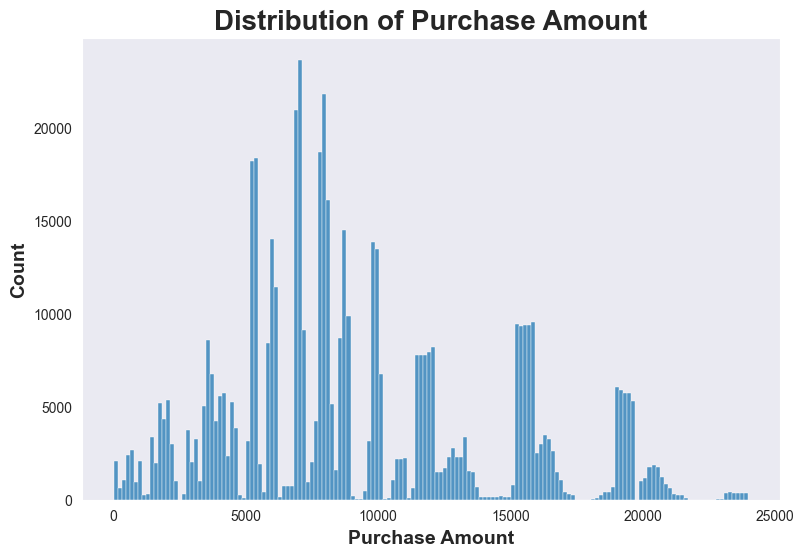

In [14]:
# Univariate Analysis
plt.figure(figsize=(9,6))
sns.set_style('dark')
sns.histplot(df['Purchase'])
plt.xlabel('Purchase Amount', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Purchase Amount', fontweight='bold', fontsize=20)

plt.savefig("../plots/univariate/Distribution_of_Purchase.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

### Insights
- Most purchases are between price range 5,000 - 10,000

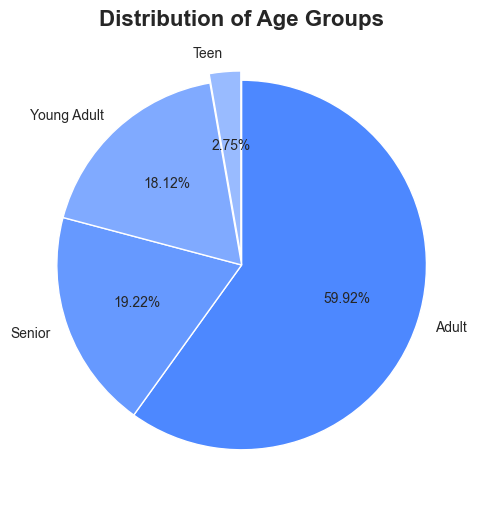

In [15]:
data = df['Age_Group'].value_counts()
color = ['#4d88ff', '#6699ff', '#80aaff', '#99bbff']
explode = [0, 0, 0, 0.05]

plt.figure(figsize=(6,6))
plt.pie(data, startangle=90, autopct='%1.2f%%', labels=data.index, colors=color, explode=explode, counterclock=False)
plt.title('Distribution of Age Groups', fontsize=16, fontweight='bold')

plt.savefig("../plots/univariate/Distribution_of_AgeGroups.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

### Insights
- Adults are most in numbers
- Teens are lowest in numbers

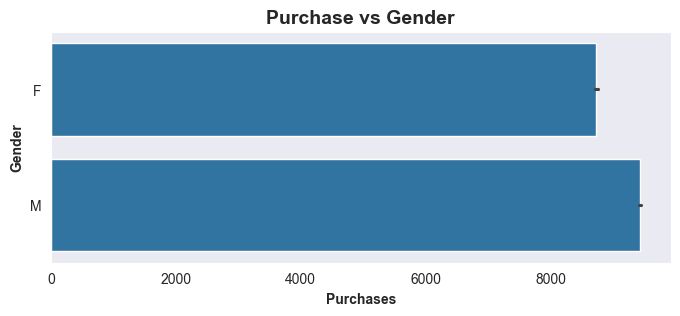

In [16]:
# Bivariate Analysis
plt.figure(figsize=(8,3))
sns.barplot(x='Purchase', y='Gender', data=df)
plt.xlabel('Purchases', fontweight='bold')
plt.ylabel('Gender', fontweight='bold')
plt.title('Purchase vs Gender', fontsize=14, fontweight='bold')

plt.savefig("../plots/bivariate/Purchase_vs_Gender.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

### Insights
- Men purchases more than Women


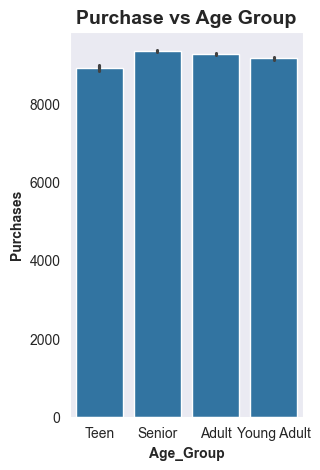

In [17]:
plt.figure(figsize=(3,5))
sns.barplot(y='Purchase', x='Age_Group', data=df)
plt.ylabel('Purchases', fontweight='bold')
plt.xlabel('Age_Group', fontweight='bold')
plt.title('Purchase vs Age Group', fontsize=14, fontweight='bold')

plt.savefig("../plots/bivariate/Purchase_vs_AgeGroups.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

### Insights
- No such impact seen by different Age group people

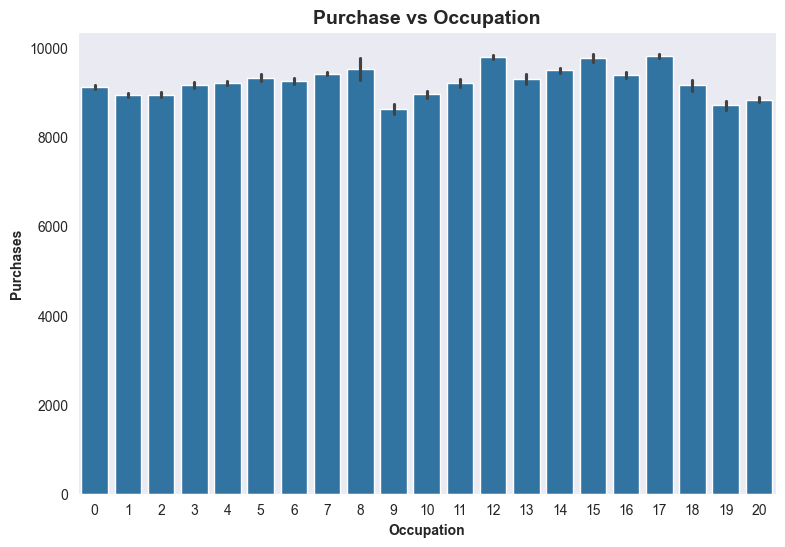

In [18]:
plt.figure(figsize=(9,6))
sns.barplot(x='Occupation', y='Purchase', data=df)
plt.ylabel('Purchases', fontweight='bold')
plt.xlabel('Occupation', fontweight='bold')
plt.title('Purchase vs Occupation', fontsize=14, fontweight='bold')

plt.savefig("../plots/bivariate/Purchase_vs_Occupation.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

### Insights
- No such impact seen by different Occupations

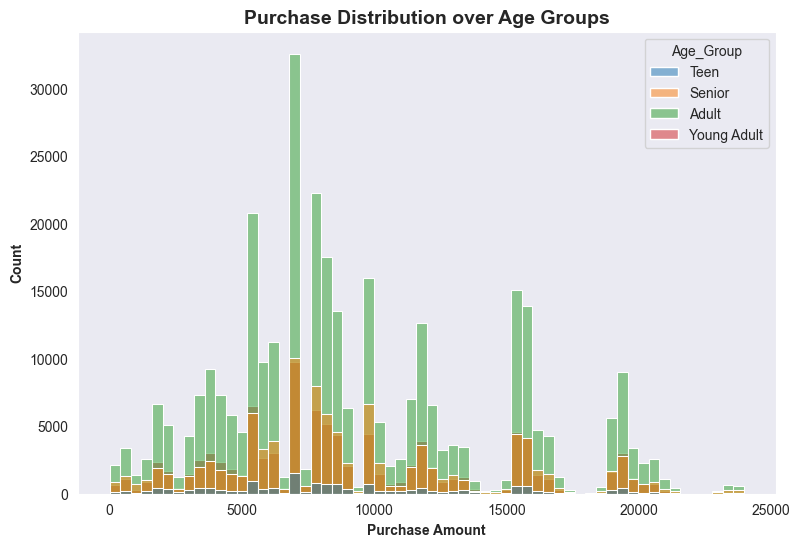

In [19]:
plt.figure(figsize=(9,6))
sns.histplot(x='Purchase', data=df, hue='Age_Group', bins=60)
plt.xlabel('Purchase Amount', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Purchase Distribution over Age Groups', fontsize=14, fontweight='bold')

plt.savefig("../plots/bivariate/Purchase_Distribution_over_AgeGroups.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

### Insights
- Most purchases are from Adults
- Lowest purchases are from Teens

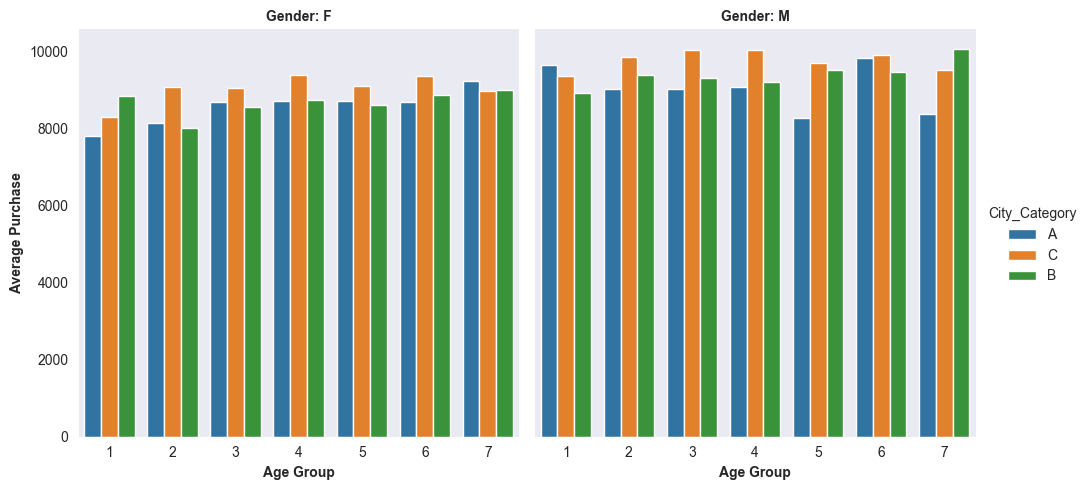

In [20]:
# Multivariate Analysis
g = sns.catplot(data=df, x="Age", y="Purchase", hue="City_Category", col="Gender", kind="bar", errorbar=None, estimator=np.mean, height=5, aspect=1)
g.set_titles("Gender: {col_name}", fontweight='bold', fontsize=12)
g.set_axis_labels("Age Group", "Average Purchase", fontweight='bold')

plt.savefig("../plots/multivariate/Purchase_Gender_Age_City.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

### Insights
- Men average purchase is slightly higher than Women
- City category C can be seen having slightly higher avg purchase

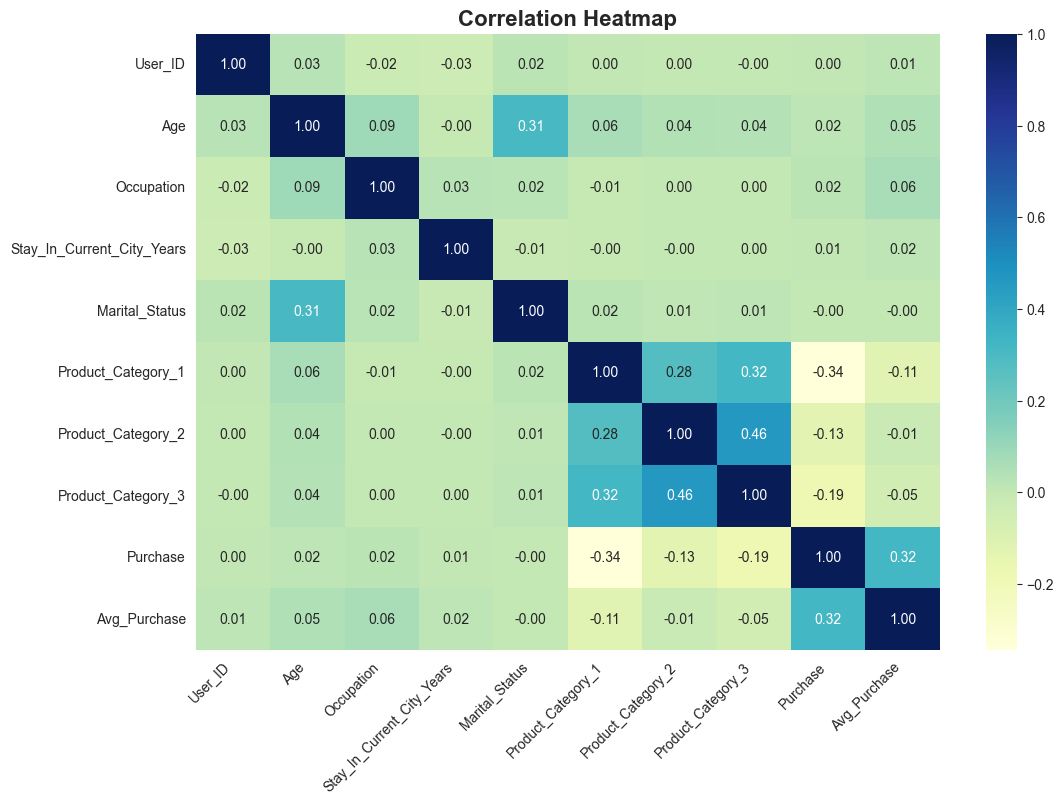

In [21]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")

plt.savefig("../plots/heatmaps/Correlation_Heatmap.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

### Conclusions
- Adults more likely to spend more
- Men spends more than Women
- City category C is have slightly higher average purchase